In [ ]:
# Copyright 2025, The Johns Hopkins University Applied Physics Laboratory LLC
# Distributed under the terms of the MIT License.

In [43]:
import numpy as np

In [44]:
from transformers import AutoTokenizer

In [45]:
import pandas as pd

In [46]:
model_length = 32000

In [47]:
model_length

32000

In [50]:
n_bins = 5

bins = [0]
bin_index = np.array(range(1,n_bins+1))

for i in range(n_bins - 1):
    bins.append(10 ** (i + 1))

bins.append(model_length)

In [58]:
bins

[0, 10, 100, 1000, 10000, 32000]

In [27]:
df = pd.read_csv("../data/_projects_LM_vicuna_13B_wikipedia_tokenized_outputs.csv", usecols=["k"])

In [66]:
df_twitter = pd.read_csv("../data/_projects_LM_vicuna_13B_semeval_twitter_tokenized_outputs.csv")

In [73]:
import ast
df_twitter.text = df_twitter.text.apply(ast.literal_eval)

In [77]:
df_twitter['length'] = df_twitter.text.apply(len)

In [82]:
df_twitter[df_twitter.length==1].index[0:2]

Int64Index([0, 31], dtype='int64')

In [88]:
list(range(0,31))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

0      1592
1      8564
2     26387
3     21041
4     14137
5     29803
6     25756
7     15029
8     12591
9      4173
10     3291
11        5
12    17291
13    17953
14    31139
15    20855
16    11779
17     4881
18    21029
19      190
20    11751
21     6198
22    18571
23    26566
24    15060
25    27152
26    27624
27    16365
28    20865
29    11553
30     6739
Name: k, dtype: int64

In [59]:
binned = np.digitize(df.k, bins)

In [64]:
binned_twitter = np.digitize(df_twitter.k, bins)

In [53]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Vicuna 13B K Frequency for Wikipedia Dataset')

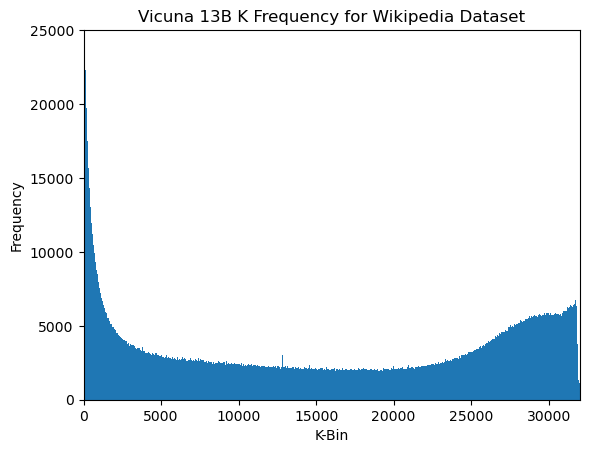

In [54]:
plt.hist(df.k, bins=1000)
plt.xlim([0, 32000])
plt.ylim([0, 25000])
plt.ylabel("Frequency")
plt.xlabel("K-Bin")
plt.title("Vicuna 13B K Frequency for Wikipedia Dataset")

(array([ 57610.,  64676.,  71865.,  62333., 104433.]),
 array([    0. ,  6399.4, 12798.8, 19198.2, 25597.6, 31997. ]),
 <BarContainer object of 5 artists>)

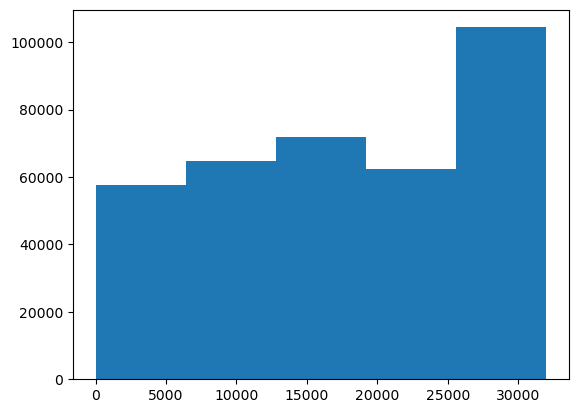

In [93]:
plt.hist(df_twitter.k, bins=5)

Text(0.5, 1.0, 'Vicuna 13B Power of 10 Bin for Wikipedia Dataset')

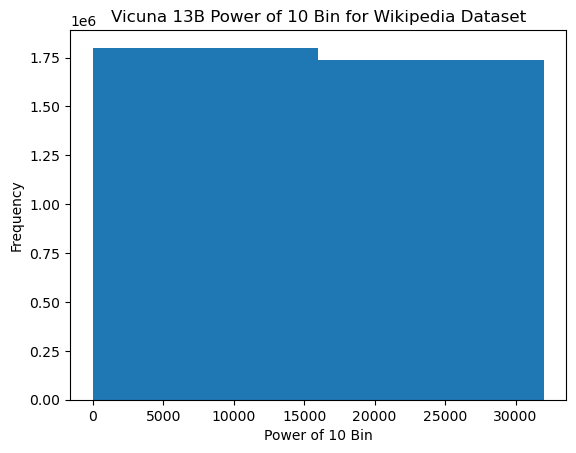

In [94]:
plt.hist(df.k, bins=2)
plt.ylabel("Frequency")
plt.xlabel("Power of 10 Bin")
plt.title("Vicuna 13B Power of 10 Bin for Wikipedia Dataset")

Text(0.5, 1.0, 'Vicuna 13B Power of 10 Bin for Twitter Dataset')

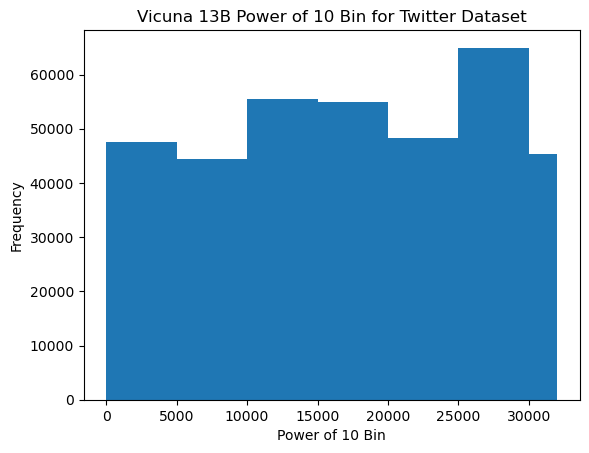

In [100]:
plt.hist(df_twitter.k, bins=[0, 5000,10000, 15000, 20000, 25000, 30000, 32000])
plt.ylabel("Frequency")
plt.xlabel("Power of 10 Bin")
plt.title("Vicuna 13B Power of 10 Bin for Twitter Dataset")

Text(0.5, 1.0, 'Vicuna 13B Twitter Sentence Token K')

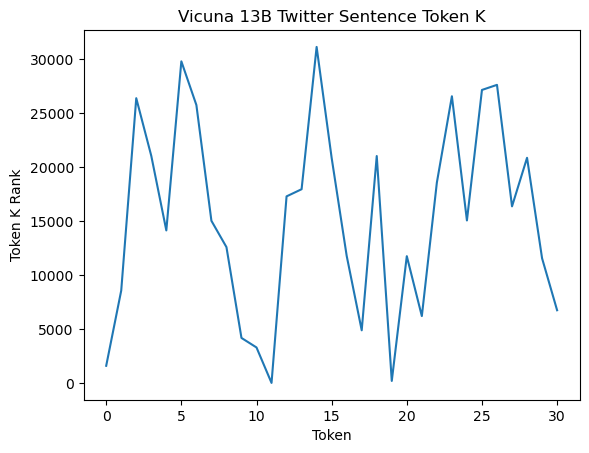

In [91]:
plt.plot(df_twitter.iloc[0:31].k)
plt.xlabel("Token")
plt.ylabel("Token K Rank")
plt.title("Vicuna 13B Twitter Sentence Token K")